<table>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
          Prepared by Cenk Tüysüz
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Y}{ \mymatrix{cc}{0 & -i \\ i & 0}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# 9 - Grover's Search Algorithm

In this notebook we will implement the Grover's Search Algorithm. You can refer to [Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/grover.html) for detailed instructions.

Let's implement the algorithm for N=4 using 2 qubits. The algorithm starts by creating a superposition state. And, an oracle function, which we originally don't know, marks an element. Then we use the Grover's Search Algorithm to find the marked element.

We will need only an iteration for the N=4 case. If we want to implement Grover's Search Algorithm for M multiple solutions in N numbers, we should iterate $\sqrt{N/M}$ times.

For N=4 oracle functions can be build using the below circuits:

To mark the $\ket{00}$ state we have:

<img src="./figures/grover_circuit_2qbuits_oracle_00.png" width="25%"> 


To mark the $\ket{11}$ state we have:

<img src="./figures/grover_circuit_2qbuits_oracle_11.png" width="20%"> 

To mark the $\ket{01}$  and $\ket{10}$ state we have:

<img src="./figures/grover_circuit_2qbuits_oracle_01_10.png" width="50%"> 




The complete Grover's Search circuit where we apply a single iteration is given below:

<img src="./figures/grover_circuit_2qubits_full_00.png" width="50%"> 


In [1]:
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

We start by creating the superpositon state.

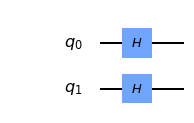

In [2]:
n = 2 # choose n=2 for N=4
grover_circuit = QuantumCircuit(n)
# create superpositon
for qubit in range(n):
    grover_circuit.h(qubit)
grover_circuit.draw('mpl')

We apply the oracle function

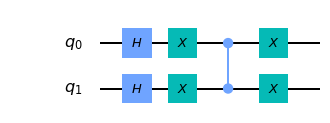

In [3]:
for qubit in range(n):
    grover_circuit.x(qubit)

grover_circuit.cz(0, 1)

for qubit in range(n):
    grover_circuit.x(qubit)

grover_circuit.draw('mpl')

Then, the Grover's Search part begins:

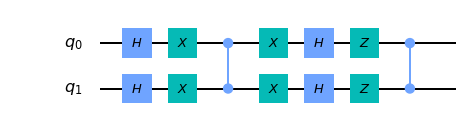

In [4]:
for qubit in range(n):
    grover_circuit.h(qubit)

for qubit in range(n):
    grover_circuit.z(qubit)
grover_circuit.cz(0, 1)

grover_circuit.draw('mpl')

Apply the final Hadamard:

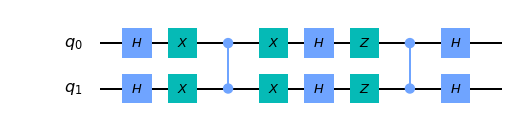

In [5]:
for qubit in range(n):
    grover_circuit.h(qubit)

grover_circuit.draw('mpl')

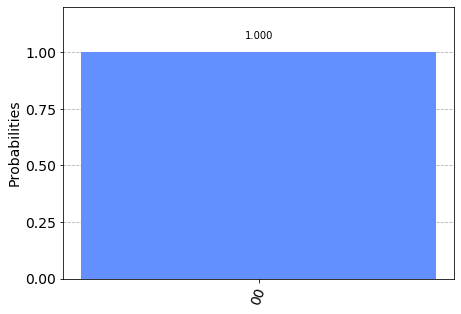

In [6]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

You can try other oracles and more qubits to get comfortable with the Grover's Search Algorithm.

### Exercise

1- Implement the Grover's Search Algorithm for N=8 where the mark the states are $\ket{001}$ and $\ket{100}$.

2- Implement the Grover's Search Algorithm for N=16 where the mark the state is $\ket{1111}$.